# <b>Section 1: Data Exploration</b>

### <b><u>Step 1</u>: Import library</b>

##### These are the main libraries used for data exploration:
- `numpy`: used for mathematical operations on matrices
- `pandas`: used to store data from .csv/.tsv files and operate functions on DataFrame
- `matplotlib`: used to visualize data

In [1]:
import sys  
sys.path.insert(0, '../../data')
sys.path.insert(0, '../../data/description')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

### <b><u>Step 2</u>: Import songs data from 'songs_data.csv' file</b>

First, let's read the Spotify's songs data from `songs_data.tsv` file by using pandas.

In [3]:
songs_df_raw = pd.read_csv('../../data/songs_data.tsv', sep='\t')

### <b><u>Step 3</u>: Remove duplicate rows in the raw data</b>

Next, let's check whether the DataFrame has duplicate rows that needs to be removed.

In [4]:
duplicated_rows = songs_df_raw.duplicated().sum()
duplicated_rows

35

So there are 35 rows that are duplicated, these are the rows that we don't need in the DataFrame.

Therefore, we need to drop those 35 rows and see some of the first rows of the dataset.

In [5]:
songs_df = songs_df_raw.drop_duplicates()
songs_df.head()

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
0,2BgEsaKNfHUdlh97KmvFyo,2002,Anne-Marie,"tropical house,pop,dance pop,pop dance,post-te...",10228985,76,183,Speak Your Mind (Deluxe),2018-04-27,72,186986,False,81
1,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),"Sam Smith,Kim Petras","uk pop,transpop,pop,dance pop","20747240,825245","87,82",182,Unholy (feat. Kim Petras),2022-09-22,88,156943,False,100
2,4Pbg79cTBu4vgSphoyNq3j,2002,Anne-Marie,"tropical house,pop,dance pop,pop dance,post-te...",10228985,76,183,2002,2018-04-19,52,186986,False,63
3,2Zc3DlVHtwqAVE4KcdajnN,2022,"Baby Storme,Alex Cain",NaN,"43572,43","34,18",183,2022,2022-04-08,25,192000,False,36
4,65fpYBrI8o2cfrwf2US4gq,Rewrite The Stars,"Zac Efron,Zendaya","pop,dance pop,hollywood,show tunes,post-teen pop","757199,3556331","67,69",183,The Greatest Showman (Original Motion Picture ...,2017-12-08,77,217440,False,72


### <b><u>Step 4</u>: Explore the dataset</b>

In this next step, we will explore the features of the dataset. First, let's check how many rows and columns in the DataFrame.

In [6]:
num_rows, num_cols = songs_df.shape
num_rows, num_cols

(2965, 13)

There are 2965 rows and 13 columns in total.

Next, we need to know what are the columns of the DataFrame and check whether we need to remove any of them.

In [7]:
columns = songs_df.columns
columns

Index(['id', 'name', 'artist', 'genres', 'artist_followers',
       'artist_popularity', 'markets', 'album', 'released_date',
       'album_popularity', 'duration', 'explicit', 'popularity'],
      dtype='object')

To discover the meaning of each column, we can load data from `songs_data_des.csv` file

In [8]:
songs_des_df = pd.read_csv('../../data/description/songs_data_des.csv', on_bad_lines='skip')
songs_des_df

,column name,data type,meaning,example
0,id,string,The Spotify ID of track,3nqQXoyQOWXiESFLlDF1hG
1,name,string,The name of the track,Unholy (feat. Kim Petras)
2,artist,string,The artist(s) of the track,Sam Smith.Kim Petras
3,genres,string,The genres of that artist(s),uk pop.transpop.pop.dance pop
4,artist_followers,string,The number of followers of the artist(s),20747240.825245
5,artist_popularity,string,"""The popularity of the artist(s). The value w...",87.82
6,markets,int,The number of countries which the track is av...,182
7,album,string,The album of the track,Unholy (feat. Kim Petras)
8,released_date,string,The released date of the track,2022-09-22
9,album_popularity,int,"""The popularity of the album.""",88


At the moment, we don't really need to use the feature `explicit` for data exploration. So we will decide to drop it for now.

In [9]:
songs_df.drop('explicit', inplace=True, axis=1, errors='ignore')

Next, we need to recheck the data types of each column.

In [10]:
dtypes = songs_df.dtypes
dtypes

id                   object
name                 object
artist               object
genres               object
artist_followers     object
artist_popularity    object
markets               int64
album                object
released_date        object
album_popularity      int64
duration              int64
popularity            int64
dtype: object

As we can see, there are only 4 numeric categories: `markets`, `album_popularity`, `duration` and `popularity`. The rest of the columns are either string or list types but in DataFrame, string and list are categorized as object.

Let's get the detailed info and number of non-null values of each column.

In [11]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2965 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2965 non-null   object
 1   name               2965 non-null   object
 2   artist             2965 non-null   object
 3   genres             2520 non-null   object
 4   artist_followers   2965 non-null   object
 5   artist_popularity  2965 non-null   object
 6   markets            2965 non-null   int64 
 7   album              2965 non-null   object
 8   released_date      2965 non-null   object
 9   album_popularity   2965 non-null   int64 
 10  duration           2965 non-null   int64 
 11  popularity         2965 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 301.1+ KB


We can notice that there are some null values in genres column, therefore, we need to explore how many values are missing in each column of the dataset.

In [12]:
null_cols = songs_df.isnull().sum()
null_cols

id                     0
name                   0
artist                 0
genres               445
artist_followers       0
artist_popularity      0
markets                0
album                  0
released_date          0
album_popularity       0
duration               0
popularity             0
dtype: int64

So there are 445 missing values in the `genres` column, the other columns in the DataFrame does not have any null values. 

As for now, we will move on to the data preprocessing step to clean and normalize all the data.

### <b><u>Step 6</u>: Preprocessing the dataset</b>

##### Calculate missing ratio, num_diff_vals and diff_vals of numerical and categorical columns

In this part, we need to explore values in categorical columns. 

We build some help functions below to calculate the missing ratio of values in the columns (in percentage), calculate number of different values and the list of different values.

In [13]:
def missing_ratio(c):
    return c.isnull().sum() / c.__len__() * 100

def num_diff_vals(c):
    if c.all() == songs_df['genres'].all() or c.all() == songs_df['artist'].all():
        return c.str.split(',').explode().nunique()
    return c.nunique(dropna=True)

def diff_vals(c):
    if c.all() == songs_df['genres'].all() or c.all() == songs_df['artist'].all():
        return c.str.split(',').explode().value_counts().keys().to_list()
    return c.dropna().unique()

For categorical columns, we need to specify what is the missing ratio, number of unique values and list all of the unique values. There are 3 categorical columns in the dataset: `genres`, `artist` and `album`.

In [14]:
categorical_cols_des = songs_df[['genres', 'artist', 'album']].agg([missing_ratio, num_diff_vals, diff_vals])
categorical_cols_des

,genres,artist,album
missing_ratio,15.008432,0.0,0.0
num_diff_vals,1064,2293,1386
diff_vals,"[pop, dance pop, adult standards, post-teen po...","[Nat King Cole, Dean Martin, Frank Sinatra, St...","[2020, 2021, Christmas 2022, this was 2022 the..."


##### 1. Genres

First we will need to preprocess data in `genres` column since it has null values. Each data in `genres` column is a string of genre(s) seperated by a comma (`,`). 

Therefore, we need to convert the string data into a list of genres, then fill all of the null values with `None`.

In [15]:
songs_df['genres'] = songs_df['genres'].str.split(',')
songs_df['genres'].fillna('None', inplace=True)

Next, we will add another column called `main_genre` to the DataFrame, since we think it might be useful for data modeling.

We take the first genre that appeared in the list to be the main genre.

In [16]:
songs_df['main_genre'] = songs_df['genres'].apply(lambda x: x[0] if type(x) == list else x)

##### 2. Artists

Let's move on to the `artist` column. Each data in this column is also a string of artist(s) separated by a comma. 

So we also need to convert string data into a list.

In [17]:
songs_df['artist'] = songs_df['artist'].str.split(',')

We found it also might be interesting that we add another column called `artists_count` into the DataFrame, it can be used to answer some meaningful questions.

In [18]:
songs_df['artists_count'] = songs_df['artist'].apply(len)

##### 3. Released date

We have a datetime datatype column in the DataFrame, which is the released date of the track. Therefore, we need to convert string data into datetime by using `to_datetime` function in pandas.

In [19]:
songs_df['released_date'] = pd.to_datetime(songs_df['released_date'], format='%Y-%m-%d', errors='coerce')

##### Calculate missing ratio, min and max values of numerical columns

Now we can explore the missing ratio, min and max values in numerical colums.

There are 5 numerical columns in total, including: `markets`, `album_popularity`, `duration`, `popularity` and `artists_count`. Let's explore missing ratio, min value and max value of these columns.

In [20]:
numeric_cols_des = songs_df[songs_df.describe().columns].agg([missing_ratio, min, max])
numeric_cols_des

,markets,album_popularity,duration,popularity,artists_count
missing_ratio,0.0,0.0,0.0,0.0,0.0
min,1.0,0.0,24013.0,0.0,1.0
max,183.0,97.0,7994537.0,100.0,39.0


There are some noticeable values which is:
- 1 is the minimum value of markets that a songs is available.
- The shortest song duration is 24013 ms ~ 24 seconds!
- 39 is the maximum value of the number of artists involved in a song!

For easy visualization, let's plot the description table into bar charts.
- `markets`: purple chart
- `duration`: red chart
- `album_popularity`: green chart
- `popularity`: orange chart
- `artists_count`: blue chart

<BarContainer object of 3 artists>

<Figure size 1000x2000 with 0 Axes>

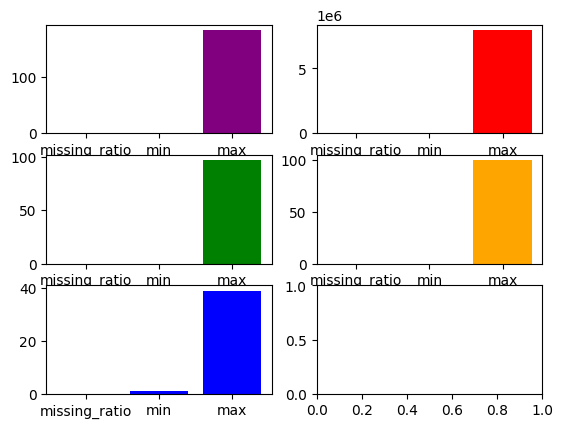

In [21]:
plt.figure(figsize=(10, 20))
_, ax = plt.subplots(3, 2)
ax[0, 0].bar(numeric_cols_des.index, numeric_cols_des['markets'], color = 'purple')
ax[0, 1].bar(numeric_cols_des.index, numeric_cols_des['duration'], color = 'r')
ax[1, 0].bar(numeric_cols_des.index, numeric_cols_des['album_popularity'], color = 'g')
ax[1, 1].bar(numeric_cols_des.index, numeric_cols_des['popularity'], color = 'orange')
ax[2, 0].bar(numeric_cols_des.index, numeric_cols_des['artists_count'], color = 'b')

### <b><u>Step 6</u>: Normalizing columns in the dataset</b>

##### 1. Artist followers

Each data in `artist_followers` column is a string of followers of respective artist(s) separated by a comma.

Therefore, we need to convert string data to a list and convert each number of followers from string to int.

In [22]:
songs_df['artist_followers'].update(songs_df['artist_followers'].str.split(','))
songs_df['artist_followers'].update(songs_df['artist_followers'].apply(lambda x: list(map(int, x))))

Next step, since we want to represent the artists' followers as a specific value only, let's normalize the list of followers into 1 number by calculating the vectorized length of the elements in the list.

In [23]:
songs_df['artist_followers'] = songs_df['artist_followers'].apply(lambda x: np.sqrt(np.sum(list(map(lambda y: y**2, x)))))
songs_df['artist_followers'] = songs_df['artist_followers'].astype('int64')

##### 2. Artist popularity

`artist_popularity` column has the same feature as `artist_followers`. So we also need to convert each data from string to list and then map all the values from string to numbers.

In [24]:
songs_df['artist_popularity'].update(songs_df['artist_popularity'].str.split(','))
songs_df['artist_popularity'].update(songs_df['artist_popularity'].apply(lambda x: list(map(int, x))))

Furthermore, we also want to represent the artists' popularity by 1 number only, therefore, let's calculate the vectorized length of each element in the list of each data.

In [25]:
songs_df['artist_popularity'] = songs_df['artist_popularity'].apply(lambda x: min(100, np.sqrt(np.sum(list(map(lambda y: y**2, x))))))
songs_df['artist_popularity'] = songs_df['artist_popularity'].astype('int64')

### <b><u> Step 7</u>: Ask some meaningful questions about the data</b>

##### Question 1: What are the top 10 most popular genres and visualize the number of songs each genre is involved in.

<AxesSubplot: >

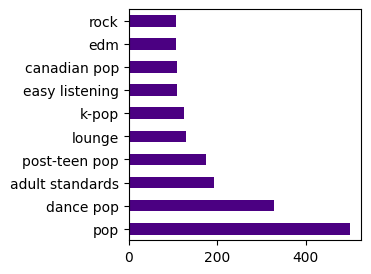

In [26]:
songs_df['genres'].str.join(',').str.split(',').explode().value_counts().drop(['N', 'o', 'n', 'e']) \
                .nlargest(n=10).plot.barh(figsize=(3,3), color='indigo')

##### Question 2: What are the top 10 most popular artists and visualize the number of songs each artist is involved in.

<AxesSubplot: >

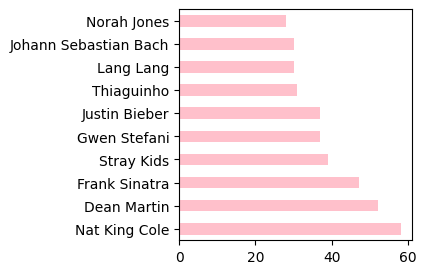

In [27]:
songs_df['artist'].str.join(',').str.split(',').explode().value_counts() \
                .nlargest(n=10).plot.barh(figsize=(3,3), color='pink')

##### Question 3: What are the top 10 most popular albums and visualize the number of songs mentioned in each album.

<AxesSubplot: >

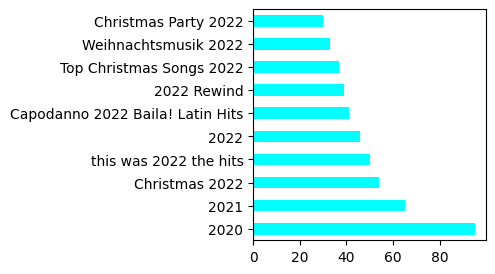

In [28]:
songs_df['album'].value_counts().nlargest(n=10).plot.barh(figsize=(3,3), color='cyan')

##### Question 4: For each song popularity value, visualize the number of songs.

<AxesSubplot: >

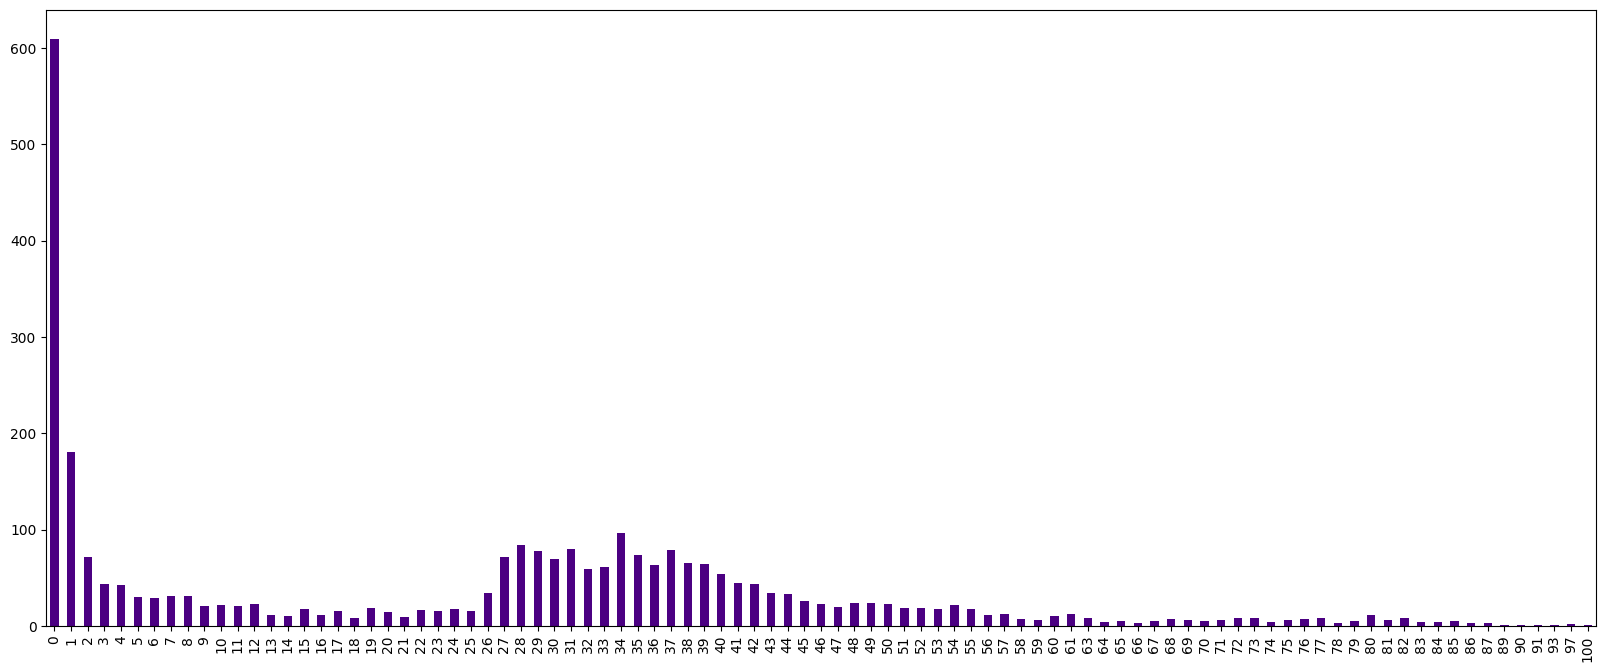

In [29]:
songs_df['popularity'].value_counts().sort_index(ascending=True) \
                    .plot.bar(figsize=(20, 8), color='indigo')

##### Question 5: List all the years the songs are released in the dataset and visualize the number of songs in each year.

<AxesSubplot: >

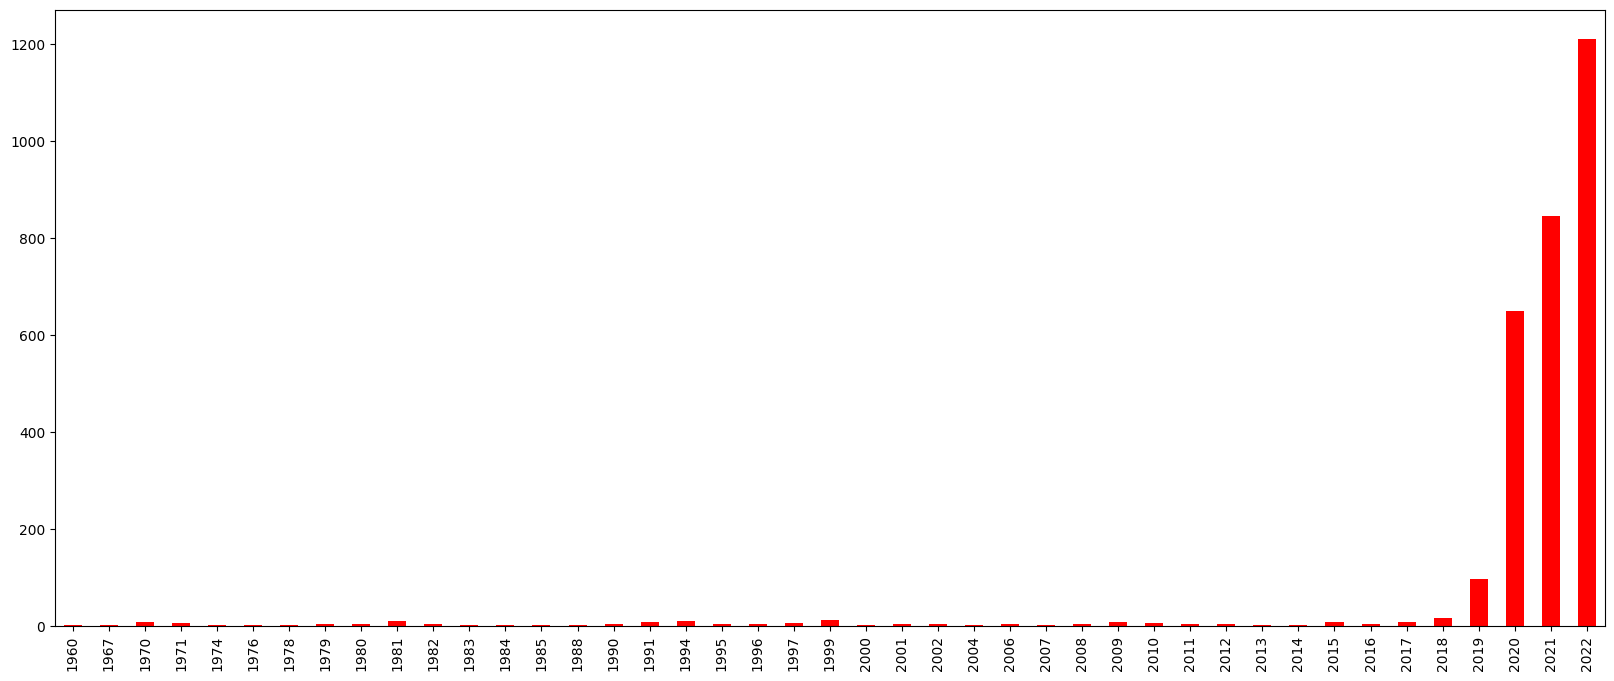

In [30]:
songs_df['released_date'].dt.year.value_counts().sort_index(ascending=True) \
                        .plot.bar(figsize=(20, 8), color='red')

##### Question 6: What are the top 5 most popular artists from 2020 to 2022.

In [31]:
songs_df[songs_df['released_date'].dt.year.between(2020, 2022)]['artist'].explode().value_counts().nlargest(n=5).index.to_list()

['Nat King Cole',
 'Dean Martin',
 'Frank Sinatra',
 'Stray Kids',
 'Justin Bieber']

### <b><u>Step 7</u>: Generate DataFrame used for model training</b>

In [32]:
songs_model_df = songs_df[['artist_followers', 'artist_popularity', 'markets', 'album_popularity', 'duration', 'artists_count', 'popularity']]
songs_model_df

,artist_followers,artist_popularity,markets,album_popularity,duration,artists_count,popularity
0,10228985,76,183,72,186986,1,81
1,20763646,100,182,88,156943,2,100
2,10228985,76,183,52,186986,1,63
3,43572,38,183,25,192000,2,36
4,3636047,96,183,77,217440,2,72
...,...,...,...,...,...,...,...
2995,6535001,85,183,49,146719,2,33
2996,161325,48,183,36,242705,1,33
2997,1286591,64,183,43,179774,1,33
2998,1286591,64,183,43,141008,1,33


For the next step, let's calculate the correlation of the model DataFrame and predict which features are affected most to each other.

In [33]:
songs_model_df.corr(method='spearman')

,artist_followers,artist_popularity,markets,album_popularity,duration,artists_count,popularity
artist_followers,1.000000,0.862982,-0.625777,-0.024550,0.045350,0.025508,-0.170199
artist_popularity,0.862982,1.000000,-0.555605,0.023361,-0.047730,0.349931,-0.102210
markets,-0.625777,-0.555605,1.000000,0.475937,0.148894,0.060635,0.564505
album_popularity,-0.024550,0.023361,0.475937,1.000000,0.095183,0.006484,0.901314
duration,0.045350,-0.047730,0.148894,0.095183,1.000000,-0.010296,0.108222
artists_count,0.025508,0.349931,0.060635,0.006484,-0.010296,1.000000,0.033788
popularity,-0.170199,-0.102210,0.564505,0.901314,0.108222,0.033788,1.000000
